In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import matplotlib.animation as animation
import imageio_ffmpeg
import statsmodels.api as sm # OLS module for linear regression

my_red = "#f53b3b" # red
my_blue = "#4287f5" # blue

/var/folders/vk/kftm8379123bsmwrdp8l0xr00000gn/T/ipykernel_1640/1281610637.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [12]:
## Ising Dynamics ##

def compute_energy(adjacency_matrix, state, J = 1.0, h = 0.0):
    # External field term
    energy = -h * np.sum(state)
    energy -= (J / 2.0) * np.dot(state, np.dot(adjacency_matrix, state))
    return energy

def simulate_ising_fixed_temp(adjacency_matrix, T, num_steps, J = 1.0, h = 0.0):
    num_nodes = len(adjacency_matrix[0])
    initial_state = np.random.choice([-1, 1], size = num_nodes)
    data = np.zeros((num_steps, 3))
    state = initial_state.copy()
    for step in range(num_steps):
        print(f"step number {step}")
        """
        metropolis update 
        consists in N node updates (N == network size)
        so that, on average, each node is updated once
        """
        for _ in range(num_nodes):
            i = np.random.randint(num_nodes)
            delta_E = 2 * state[i] * (h + J * sum(adjacency_matrix[i, j] * state[j] for j in range(len(state)) if adjacency_matrix[i, j] != 0))
            if delta_E < 0 or np.random.rand() < np.exp(-delta_E / T):
                state[i] *= -1  # Flip the spin
        """""
        """""
        energy = compute_energy(adjacency_matrix, state, J, h)
        average_magnetization = np.sum(state) / len(state)
        data[step] = [step, energy, average_magnetization]
    df = pd.DataFrame(data, columns=['n_step', 'energy', 'average_magnetization'])
    #avg_energy = np.mean(energies)
    #avg_energy_sq = np.mean(np.square(energies))
    #avg_magnetization = np.mean(magnetizations)
    #avg_magnetization_sq = np.mean(np.square(magnetizations))
    #specific_heat = (avg_energy_sq - avg_energy**2) / (k_B * T**2)
    #susceptibility = (avg_magnetization_sq - avg_magnetization**2) / (k_B * T)
    return initial_state, state, df

#def simulate_ising_over_temps(adjacency_matrix, spins, J, h, num_steps, equilibration_steps, temps):
    energies = []
    magnetizations = []
    specific_heats = []
    susceptibilities = []

    for T in temps:
        spins = initialize_spins(len(spins))  # reinitialize spins for each temperature
        E_list = []
        M_list = []

        for step in range(num_steps):
            metropolis_step(adjacency_matrix, spins, T, J, h)
            if step >= equilibration_steps:
                energy = compute_energy(adjacency_matrix, spins, J, h)
                magnetization = compute_magnetization(spins)
                E_list.append(energy)
                M_list.append(magnetization)
        
        avg_energy = np.mean(E_list)
        avg_energy_sq = np.mean(np.square(E_list))
        avg_magnetization = np.mean(M_list)
        avg_magnetization_sq = np.mean(np.square(M_list))

        specific_heat = (avg_energy_sq - avg_energy**2) / (k_B * T**2)
        susceptibility = (avg_magnetization_sq - avg_magnetization**2) / (k_B * T)

        energies.append(avg_energy)
        magnetizations.append(avg_magnetization)
        specific_heats.append(specific_heat)
        susceptibilities.append(susceptibility)

    return energies, magnetizations, specific_heats, susceptibilities

def create_square_lattice(N):
    G = nx.grid_2d_graph(N, N)
    return G

def get_dense_adj_matrix(G):
    adj_matrix = nx.adjacency_matrix(G).todense()
    return np.array(adj_matrix)

def state_colors(state):
    colors = np.where(state == 1, my_red, my_blue)
    return colors.tolist()

## Ising on 2D lattice

step number 0
step number 1
step number 2
step number 3
step number 4
step number 5
step number 6
step number 7
step number 8
step number 9


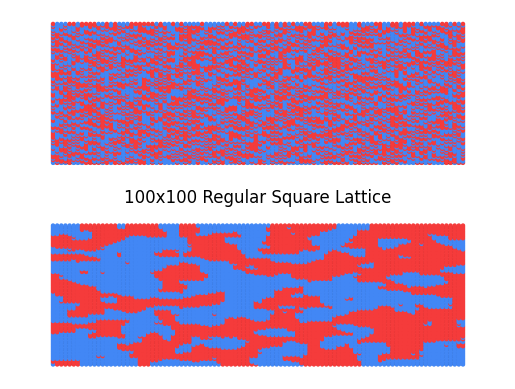

In [13]:
theoretical_critical_temperature = J * ( 2 / np.log(1 + np.sqrt(2)) )
chosen_temp = 0.5 * theoretical_critical_temperature
n_linear = 100
N = n_linear ** 2
G = create_square_lattice(n_linear)
a = get_dense_adj_matrix(G)
pos = {(x, y): (x, y) for x, y in G.nodes()}

initial_state, final_state, df = simulate_ising_fixed_temp(adjacency_matrix= a, T = chosen_temp, num_steps= 10)

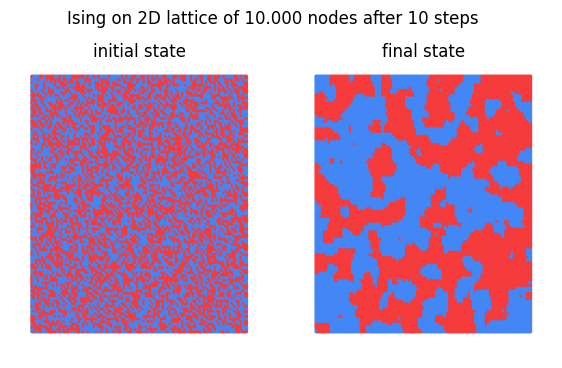

In [22]:
df.to_csv("prova.csv")
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (7, 4))
plt.subplots_adjust(wspace = 0.1)
nx.draw(G, pos, ax = ax1, node_size=5, node_color= state_colors(initial_state))
ax1.set_title("initial state", y = 0.95)
ax2.set_title("final state", y = 0.95)
nx.draw(G,  pos, ax = ax2, node_size=5, node_color= state_colors(final_state))
plt.suptitle("Ising on 2D lattice of 10.000 nodes after 10 steps")
plt.savefig("2d_lattice_initial_final.pdf")

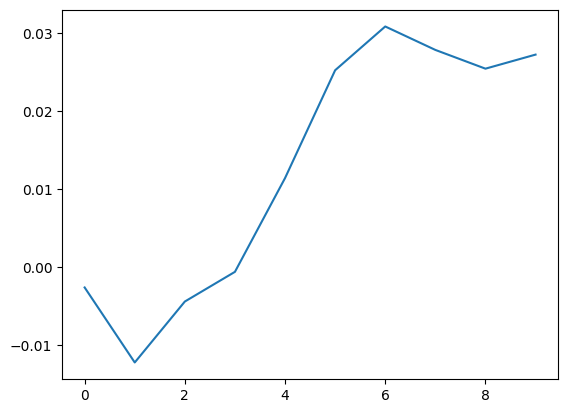

In [24]:
fig, ax = plt.subplots()
#ax.plot(df['n_step'], df['energy'])
ax.plot(df['n_step'], df['average_magnetization'])